In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF, TruncatedSVD
import nltk
from nltk.corpus import stopwords
import pandas as pd
import os
# Set NLTK data directory to /ephemeral
os.environ['NLTK_DATA'] = '/ephemeral'
nltk.data.path.append('/ephemeral')

# Download required NLTK data
nltk.download('stopwords', download_dir='/ephemeral')
nltk.download('punkt', download_dir='/ephemeral')

# df_path = "/mnt/dobby-resources/arena_logs/dobby_arena_logs_en_cleaned.csv"
df_path = "/ephemeral/dobby_arena_english_logs_70b.csv"
df = pd.read_csv(df_path)
df = df.drop_duplicates(subset=['question'], keep='first')

[nltk_data] Downloading package stopwords to /ephemeral...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /ephemeral...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Create TF-IDF vectorizer
# Adding common English stopwords plus any custom ones you might want to filter
stop_words = set(stopwords.words('english'))
custom_stop_words = {'what', 'how', 'why', 'who', 'when', 'where', 'which', 'can', 'could', 'would', 'should'}
stop_words.update(custom_stop_words)

vectorizer = TfidfVectorizer(
    max_features=1000,  # Limit to top 1000 features
    stop_words=list(stop_words),
    ngram_range=(1, 3),  # Consider both unigrams and bigrams
    min_df=5  # Ignore terms that appear in less than 5 documents
)

# Create TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(df['question'])

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()


Top terms per cluster:

Cluster 0:
ai, considering, might, like, cultural, ethical, prioritize, economic, one, think

Cluster 1:
good, day, think, project, makes, give, game, user, nice, tell

Cluster 2:
crypto, market, today, future, news, new, risks, best, current, still

Cluster 3:
blockchain, technology, work, security, networks, role, concept, smart, transparency, explain

Cluster 4:
time, statements, recognition, real time, real, facial, facial recognition, complexity, like, operations

Cluster 5:
best, ever, practices, way, project, make, projects, think, world, tell

Cluster 6:
today, weather, price, btc, assist, market, new, eth, day, world

Cluster 7:
right, answer, market, fuck, think, well, know, take, like, ai

Cluster 8:
dobby, sentient, llama, ai, project, better, like, vs, give, new

Cluster 9:
country, world, best, crypto, us, know, city, tell, ever, support


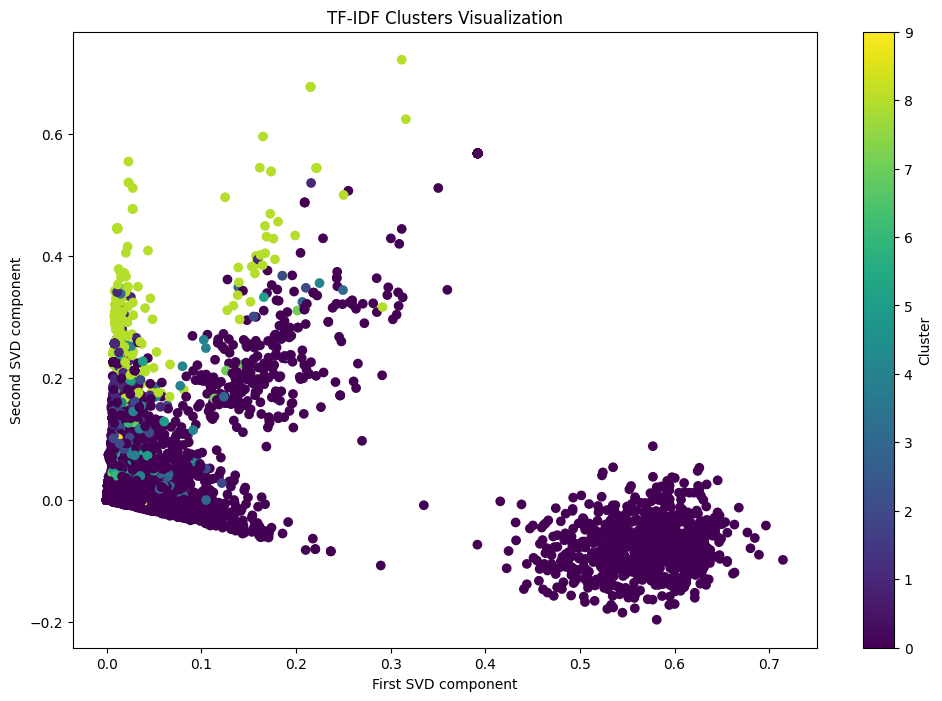


Cluster sizes:
0    8566
1     136
2     157
3     115
4     133
5     124
6      87
7      73
8     302
9      41
Name: count, dtype: int64


In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform dimensionality reduction for visualization (optional)
svd = TruncatedSVD(n_components=2)
tfidf_2d = svd.fit_transform(tfidf_matrix)

# Perform clustering
n_clusters = 10  # You can adjust this number
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

# Get top terms for each cluster
def get_top_terms_per_cluster(kmeans, feature_names, n_terms=10):
    centroids = kmeans.cluster_centers_
    top_terms = []
    
    for cluster in range(n_clusters):
        centroid = centroids[cluster]
        # Get indices of top n_terms features for this cluster
        top_indices = centroid.argsort()[-n_terms:][::-1]
        terms = [feature_names[i] for i in top_indices]
        top_terms.append(terms)
    
    return top_terms

# Get and print top terms for each cluster
top_terms_per_cluster = get_top_terms_per_cluster(kmeans, feature_names)

# Print results
print("\nTop terms per cluster:")
for i, terms in enumerate(top_terms_per_cluster):
    print(f"\nCluster {i}:")
    print(", ".join(terms))

# Create a scatter plot of the clusters (optional)
plt.figure(figsize=(12, 8))
plt.scatter(tfidf_2d[:, 0], tfidf_2d[:, 1], c=clusters, cmap='viridis')
plt.title('TF-IDF Clusters Visualization')
plt.xlabel('First SVD component')
plt.ylabel('Second SVD component')
plt.colorbar(label='Cluster')
plt.show()

# Print cluster sizes
cluster_sizes = pd.Series(clusters).value_counts().sort_index()
print("\nCluster sizes:")
print(cluster_sizes)